## Import

In [99]:
#https://peopledoc.github.io/workalendar/basic.html
from datetime import date
from datetime import timedelta
from datetime import datetime
from calendar import monthrange
#from calendra.europe import Sweden
import pandas as pd 




In [100]:

def calc_salary(month_df,name):
	from calendar import monthrange
	from datetime import date
	from datetime import datetime
	# julia
	month = month_df.head(1).index.month[0]
	year = month_df.head(1).index.year[0]
	num_days_in_month = monthrange(year,month)[1]

	if (name == 'julia'):
		salary_monthly = 31800
		parent_kr_per_day = ((salary_monthly*12*0.8*0.97))/365
		work_bonus_kr_per_day = ((salary_monthly*12*0.2*0.5))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_j']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_j'])
		all_parent_days_list = month_df[['work_bonus_day_j','parent_day_j']].max(axis=1)
		deductable_from_salary_days = month_df[['work_bonus_day_j','parent_day_j','non_paid_j']].max(axis=1)
		num_parent_days = all_parent_days_list.sum()
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_j']))
		num_work_bonus_days = sum(month_df['work_bonus_day_j'])

	elif (name == 'filip'):
		salary_monthly = 42000
		bb_10 = 46500*10
		salary_over_10bb_yearly = (salary_monthly*12)-bb_10
		salary_below_10bb_yearly = salary_monthly*12 - salary_over_10bb_yearly
		work_bonus_kr_per_day = ((salary_below_10bb_yearly*0.2)+ (salary_over_10bb_yearly))/365
		parent_kr_per_day = ((salary_below_10bb_yearly*0.8*0.97))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_f']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_f'])
		num_10_days = sum(month_df['10d_f'])
		all_parent_days_list = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
		deductable_from_salary_days = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
		num_parent_days = all_parent_days_list.sum() - num_10_days
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_f']))
		num_work_bonus_days = sum(month_df['work_bonus_day_f'])

	#num_p_julia = sum(month_df['parent_day_j'])
	
	# decide removal of salary
	if (sum(deductable_from_salary_days)==num_days_in_month):
		remove_from_salary = salary_monthly
	else:
		remove_from_salary = ((salary_monthly*12)/365)*sum(deductable_from_salary_days)
	#decide money from FK
	salary_from_work = salary_monthly - remove_from_salary
	from_fk = parent_kr_per_day*num_effective_parent_days
	from_work_bonus = num_work_bonus_days*work_bonus_kr_per_day
	from_vacation_bonus = num_effective_vacation_days*vacation_bonus_kr_per_day
	total_salary = from_fk + from_work_bonus + salary_from_work + from_vacation_bonus
	output = {}
	output['from_work_bonus'] = from_work_bonus
	output['from_fk'] = from_fk
	output['salary_from_work'] = salary_from_work
	output['total_salary'] = total_salary
	output['month'] = date(year,month,1)
	output['num_effective_vacation_days'] = num_effective_vacation_days
	output['num_effective_parent_days'] = num_effective_parent_days
	output['num_vacation_days'] = num_vacation_days
	output['num_parent_days'] = num_parent_days
	output['num_work_bonus_days'] = num_work_bonus_days
	output['salary_from_work'] = salary_from_work
	output['num_days_off'] = num_vacation_days + num_parent_days
	output['name'] = name
	return output



In [101]:
def calc_all(filename):
    data = pd.read_csv(filename,sep=';')
    data = data.fillna(0)
    data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
    data = data.set_index('date_')
    startyear = 2019
    startmonth = 5
    endyear = 2021
    endmonth = 1
    all_months = [date(m//12, m%12+1, 1) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]
    list_of_output = []
    for i in all_months:
        month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
        filip_output = calc_salary(month_df,'filip')
        julia_output = calc_salary(month_df,'julia')
        list_of_output.append(filip_output)
        list_of_output.append(julia_output)
    df = pd.DataFrame.from_dict(list_of_output)
    #df.to_csv('out.csv',index=False)
    return df


In [107]:
df1 = calc_all("input_1.csv")
df1 = df1.groupby(['month']).sum()
df1['version'] = 'version_1'

df2 = calc_all("input_2.csv")
df2 = df2.groupby(['month']).sum()
df2['version'] = 'version_2'

df3 = calc_all("input_3.csv")
df3 = df3.groupby(['month']).sum()
df3['version'] = 'version_3'

df4 = calc_all("input_4.csv")
df4 = df4.groupby(['month']).sum()
df4['version'] = 'version_4'

df_tmp1 = df1.append(df2)
df_tmp2 = df_tmp1.append(df3)
df = df_tmp2.append(df4)
df = df.reset_index()

In [216]:
#df.pivot_table(index='version',aggfunc=sum, fill_value=0).T
pd.options.display.float_format = '{:.0f}'.format
df.groupby(['version']).sum()[['from_fk','from_work_bonus','salary_from_work','total_salary','num_effective_parent_days','num_effective_vacation_days','num_days_off','num_parent_days','num_vacation_days','num_work_bonus_days']].T


version,version_1,version_2,version_3,version_4
from_fk,313932,325803,254641,257158
from_work_bonus,84124,79792,79792,78852
salary_from_work,787780,778022,778022,762084
total_salary,1195410,1194315,1123153,1109512
num_effective_parent_days,344,358,270,272
num_effective_vacation_days,62,67,67,71
num_days_off,732,750,750,769
num_parent_days,619,630,630,643
num_vacation_days,113,120,120,126
num_work_bonus_days,362,355,355,346


In [217]:
data = pd.read_csv("input_4.csv",sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')
i = date(2019,8,1)
month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
calc_salary(month_df,'filip')


{'from_fk': 15817.643835616438,
 'from_work_bonus': 0.0,
 'month': datetime.date(2019, 8, 1),
 'name': 'filip',
 'num_days_off': 16.0,
 'num_effective_parent_days': 16.0,
 'num_effective_vacation_days': 0.0,
 'num_parent_days': 16.0,
 'num_vacation_days': 0.0,
 'num_work_bonus_days': 0.0,
 'salary_from_work': 19906.849315068492,
 'total_salary': 35724.493150684932}

In [219]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [ ]:
## plot totals between different versions
df.pivot(index='month', columns='version', values='total_salary').plot(kind='bar',figsize=(16,8))
plt.show()

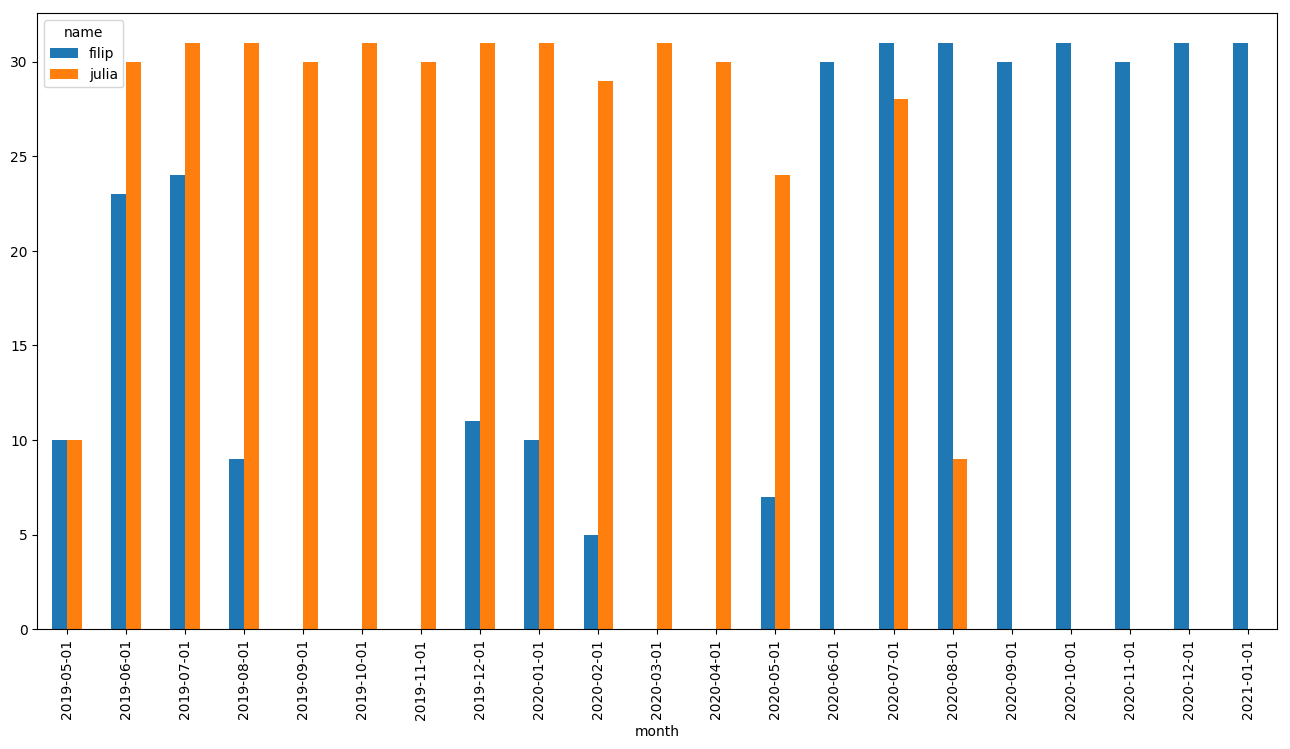

In [120]:
## plot diff between names in the same version
calc_all("input_3.csv").reset_index().pivot('month','name','num_days_off').plot(kind='bar',figsize=(16,8))
plt.show()

In [251]:
## plot calendar for one version
filename='input_4.csv'
data = pd.read_csv(filename,sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')


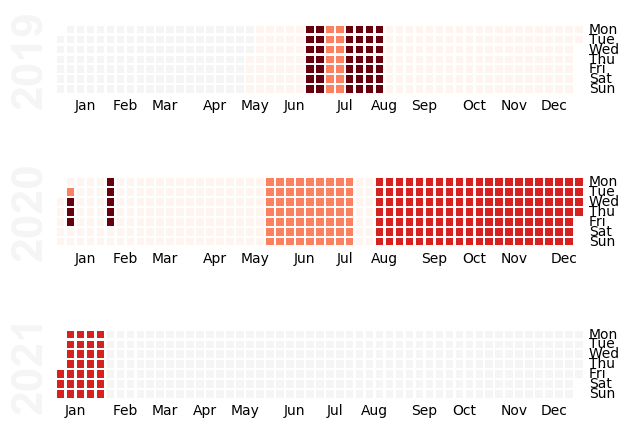

In [252]:
events = data['multi_f']
calmap.calendarplot(events, yearlabels=True)
plt.show()


In [253]:
def cal_printer(x):
    if (x['double_day']>0):
        return -1
    elif (x['multi_j']>0):
        return 0
    elif (x['multi_f']>0):
        return 1
    elif (x['vacation_j']>0):
        return -0.5
    elif (x['vacation_f']>0):
        return 0.5
data['who_parent'] = data.apply(cal_printer ,axis=1)


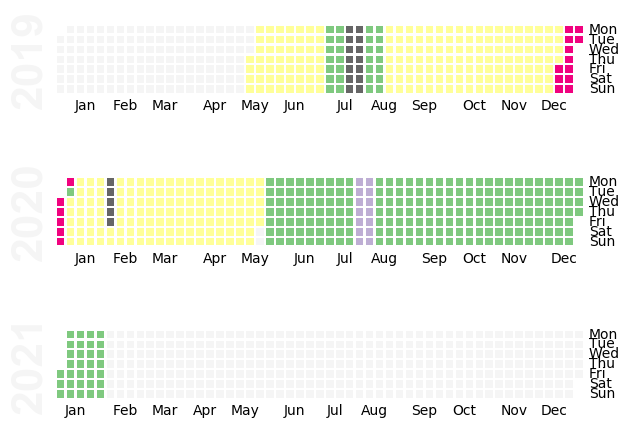

In [254]:
events = data['who_parent']
calmap.calendarplot(events, yearlabels=True, cmap='Accent_r')
plt.show()
